In [1]:
#                      1. Installing Required Libraries


#%pip install pandas
#%pip install catboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')

In [2]:
#               2. Reading and Understanding our Data

df = pd.read_csv('alzheimers_disease_data.csv')
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [ ]:
# Overview of Data: check the structure and size of the dataset.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
# get a statistical summary of a Data
# generates a statistical summary of the numeric columns in the Data. For each numeric column

df.describe().T


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [5]:
print(df.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

In [6]:
# Count duplicated rows in the DataFrame
sum(df.duplicated())

0

In [35]:
# Count occurrences of each unique value in the 'DoctorInCharge'
df.DoctorInCharge.value_counts()

AttributeError: 'DataFrame' object has no attribute 'DoctorInCharge'

In [8]:
# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

# Initial Data Exploration Summary
# The dataset contains a total of 2,149 observations.
# All values in the dataset are non-null and numerical.
# There are no duplicate records.
# After removing the `DoctorInCharge` and `PatientID` columns, the dataset consists of 33 features

In [9]:
#                          3. Data Visualization

# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

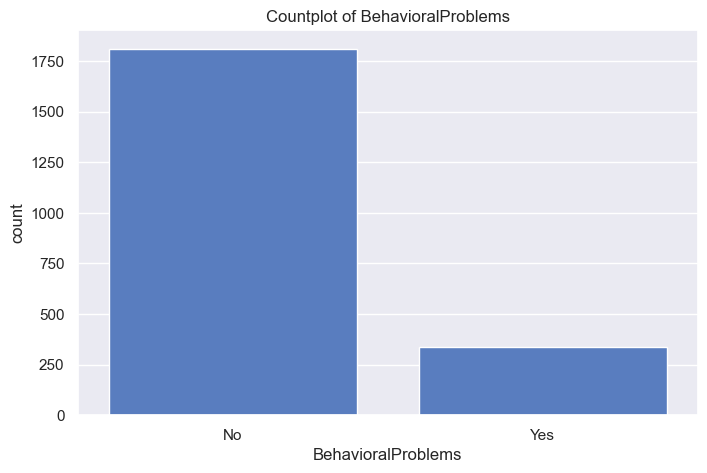

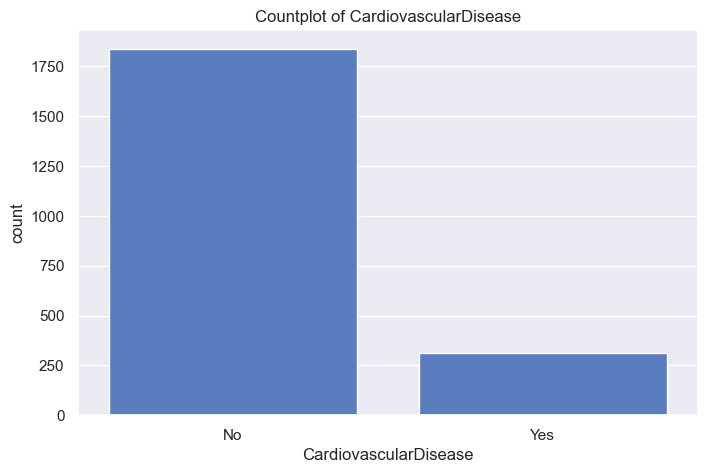

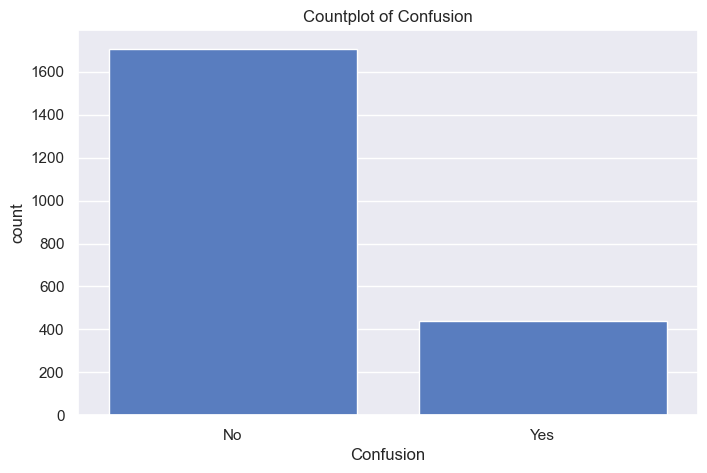

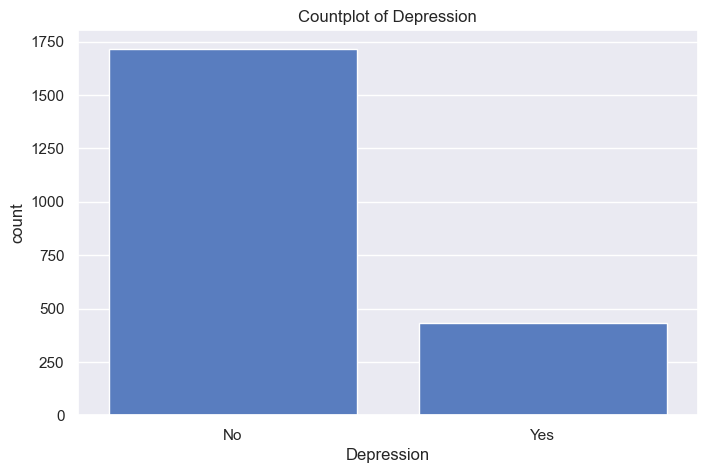

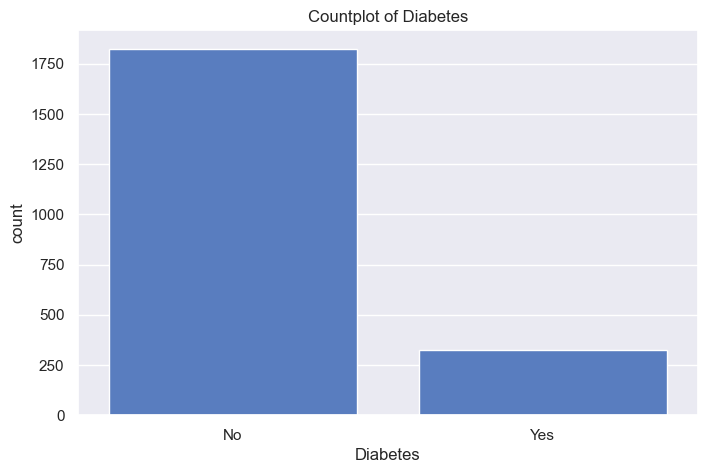

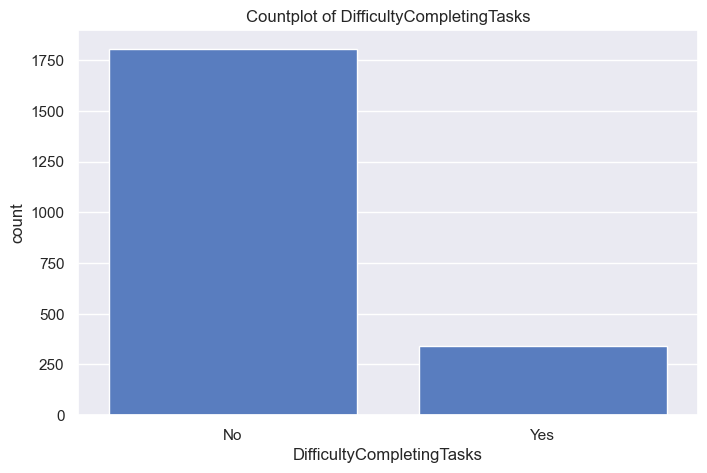

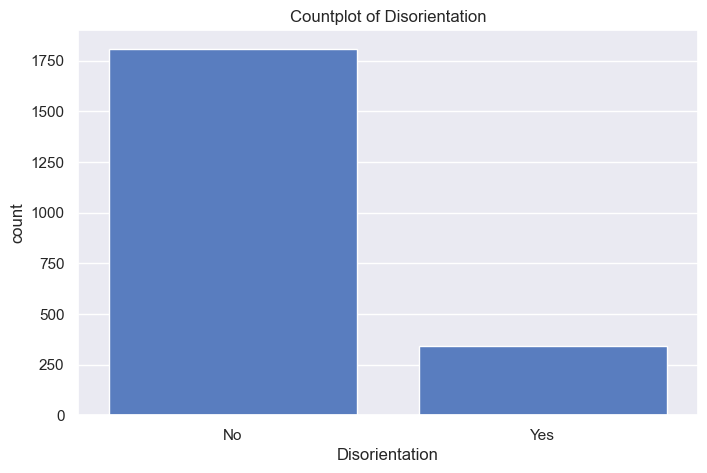

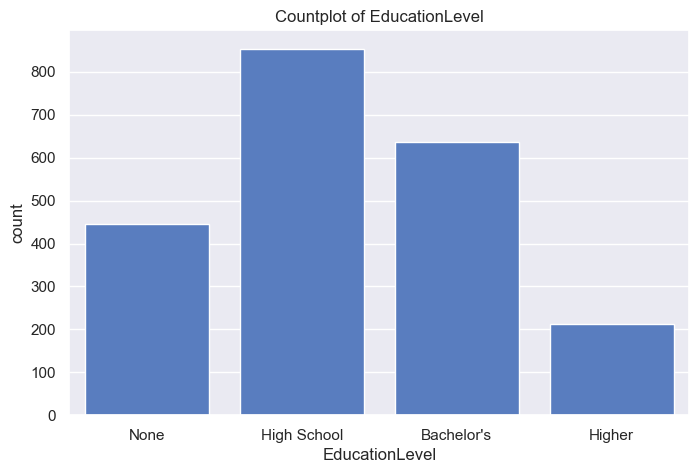

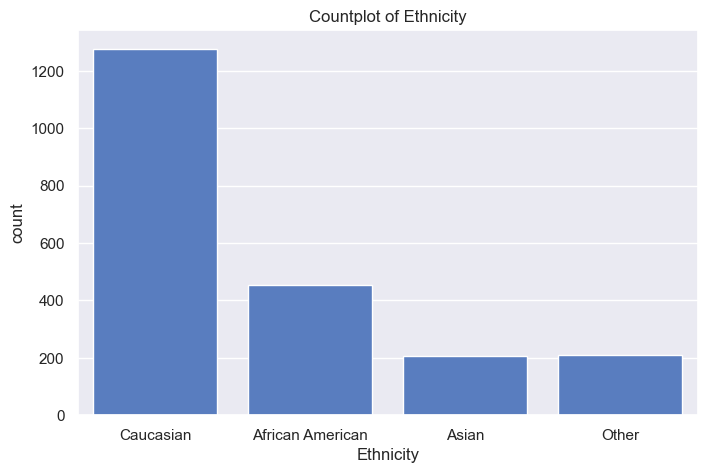

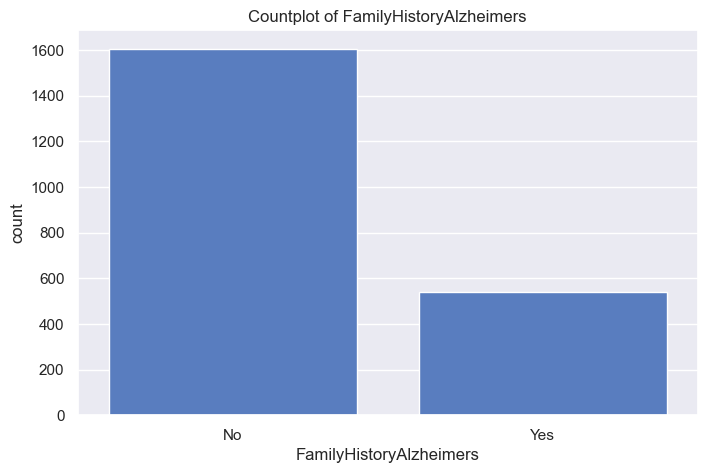

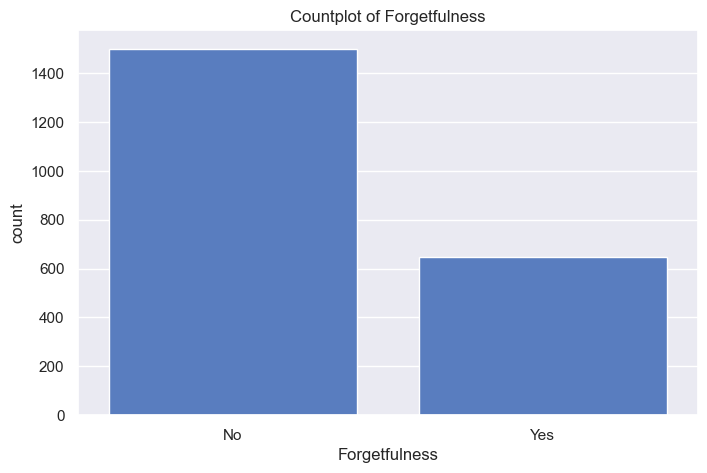

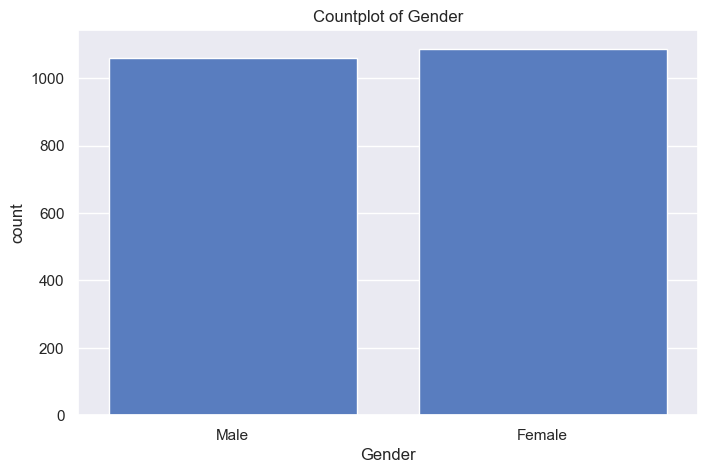

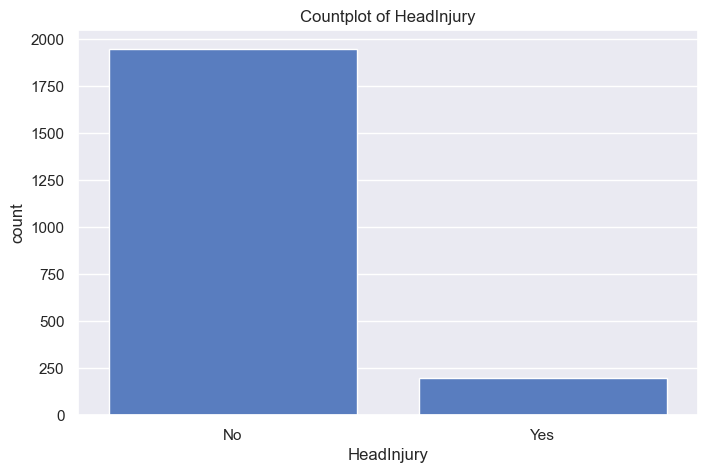

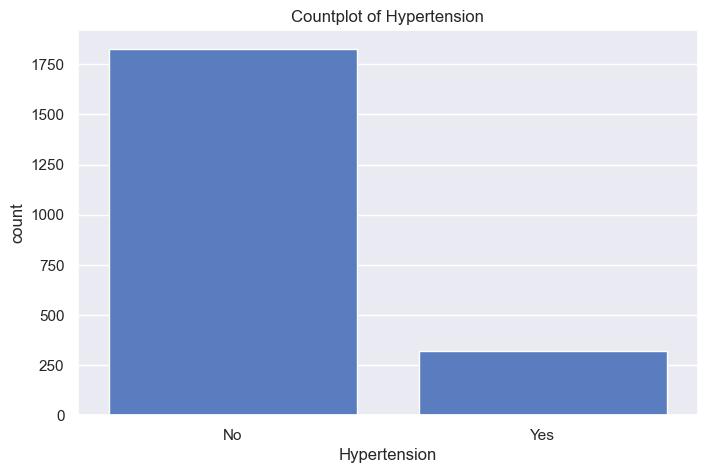

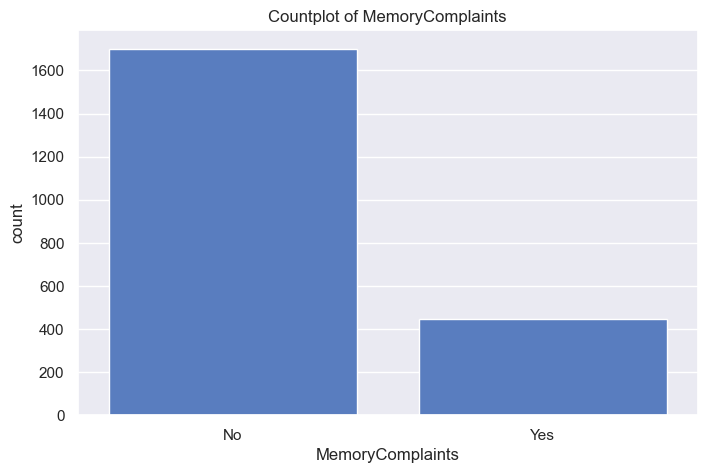

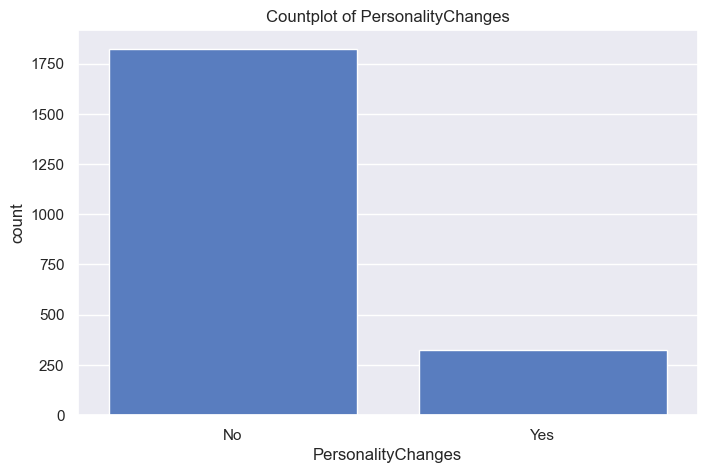

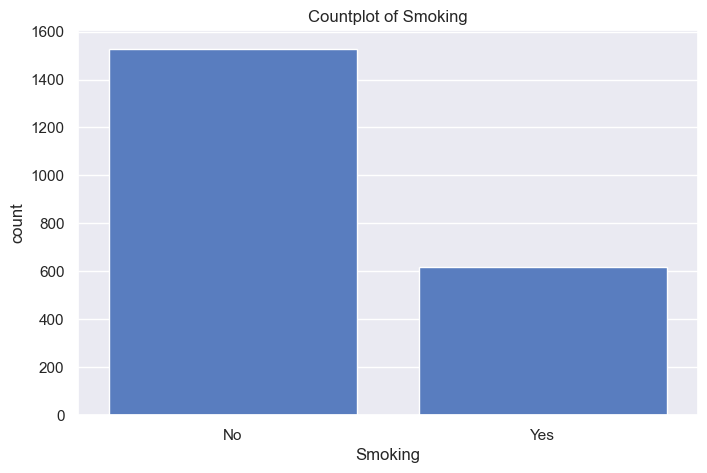

In [10]:
#                         3.1. Distribution of Categorical Features
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()



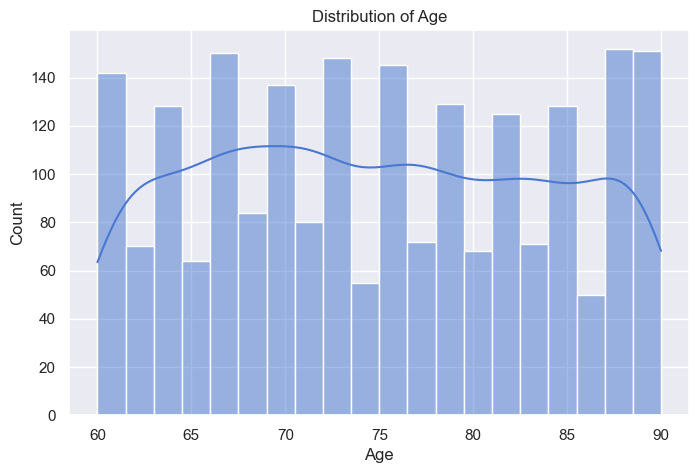

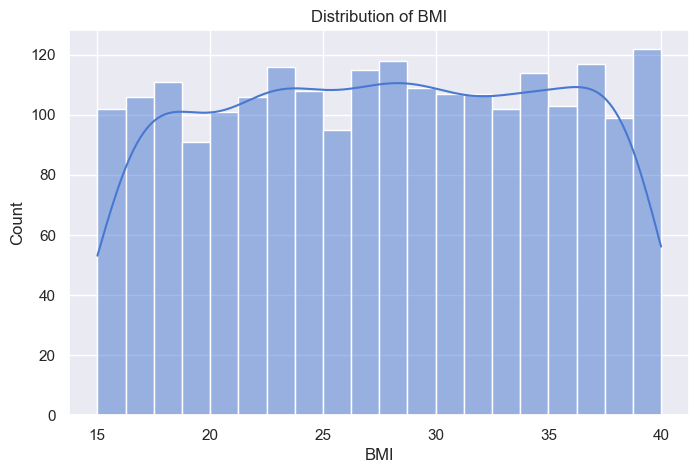

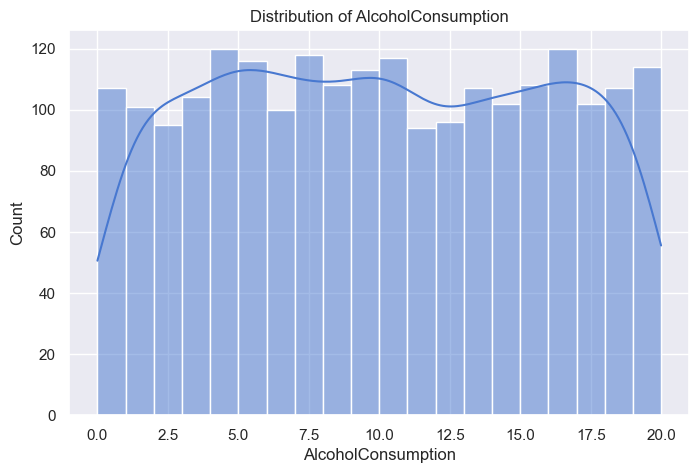

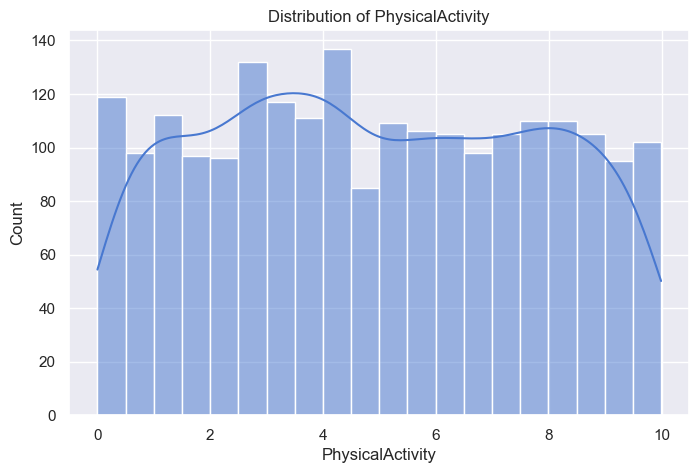

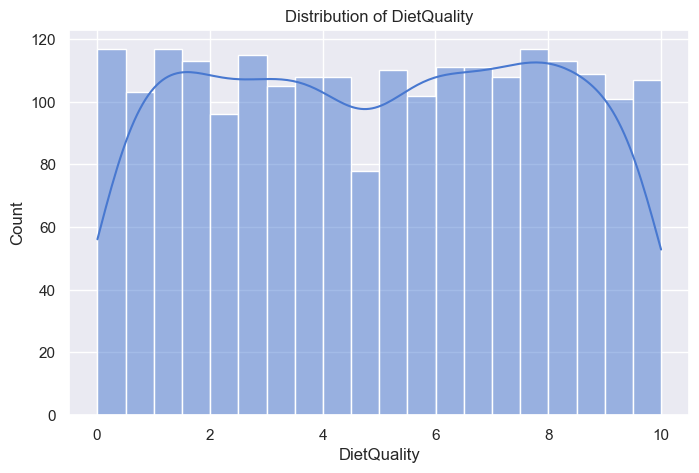

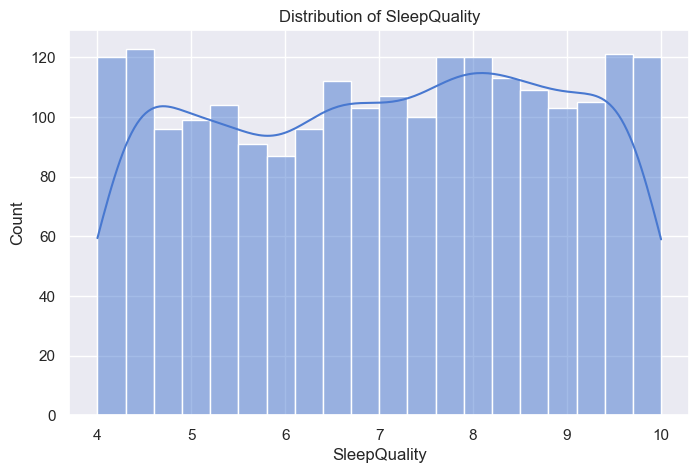

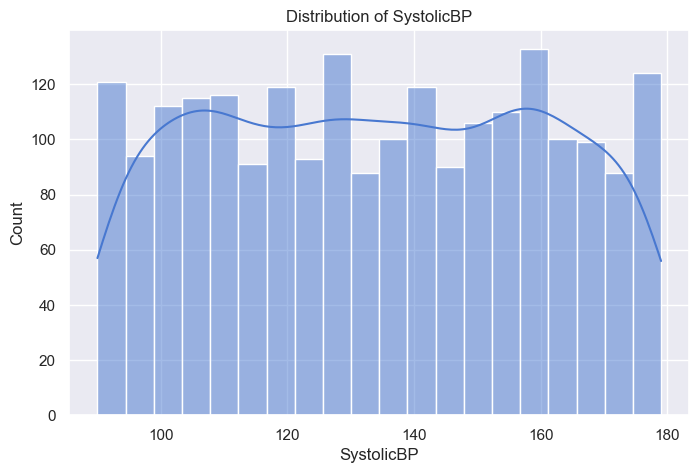

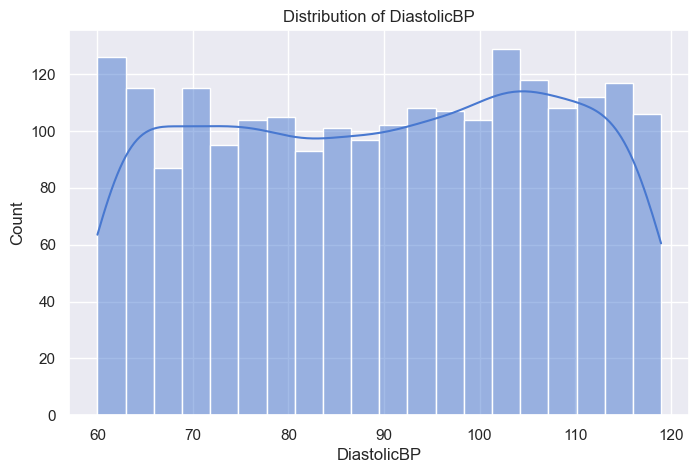

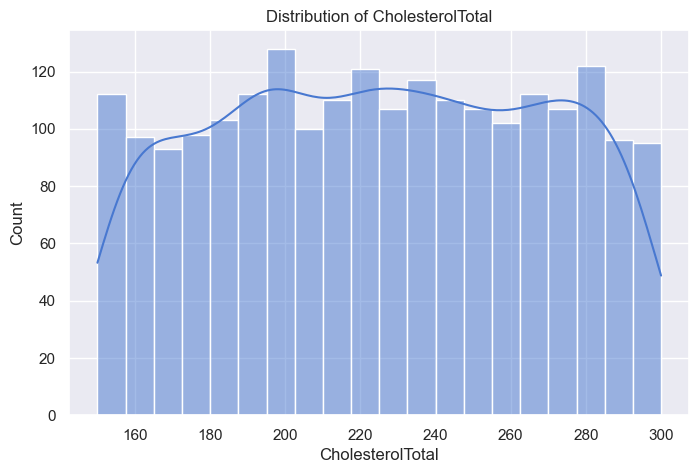

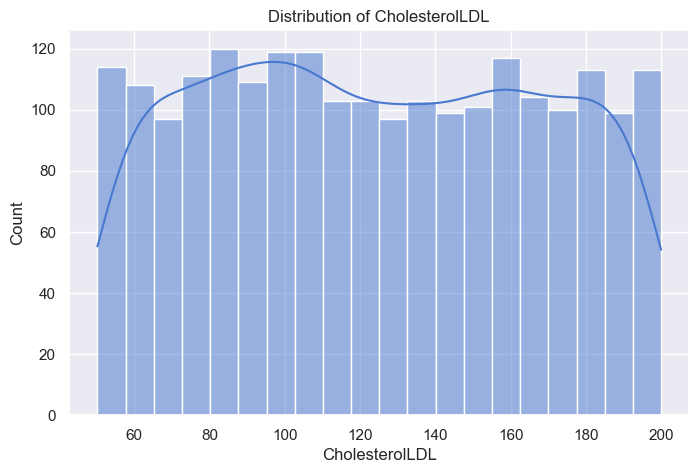

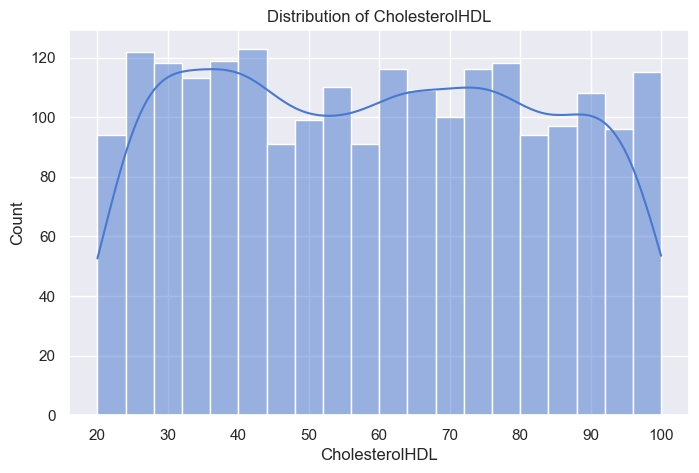

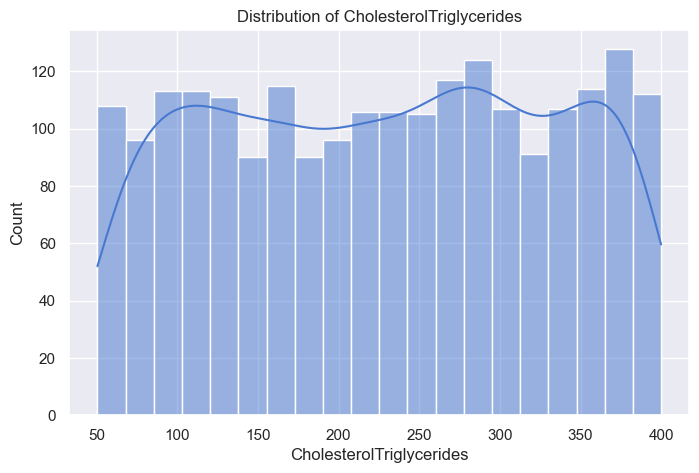

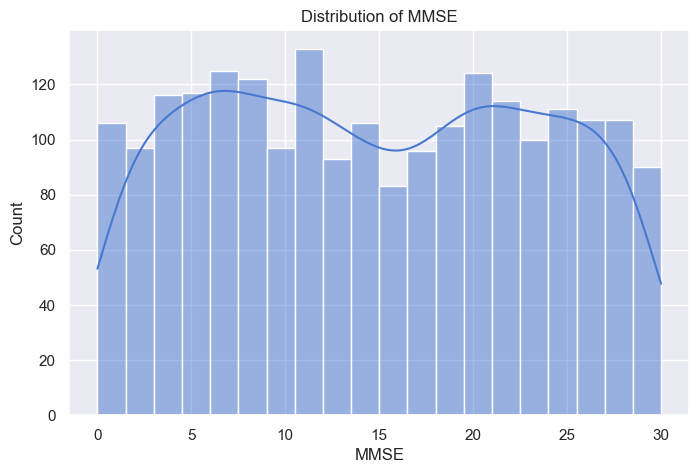

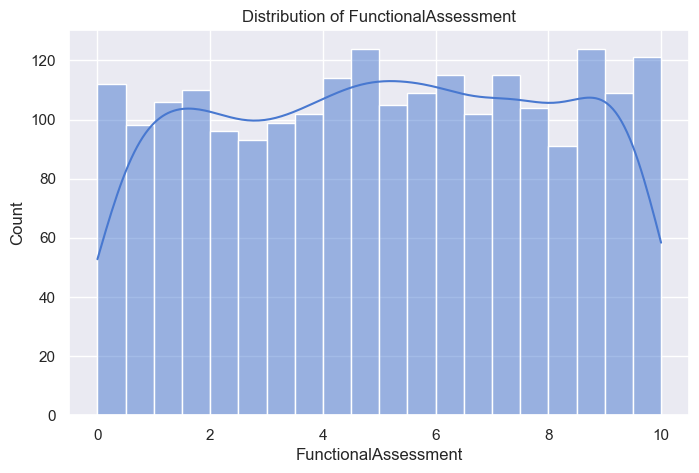

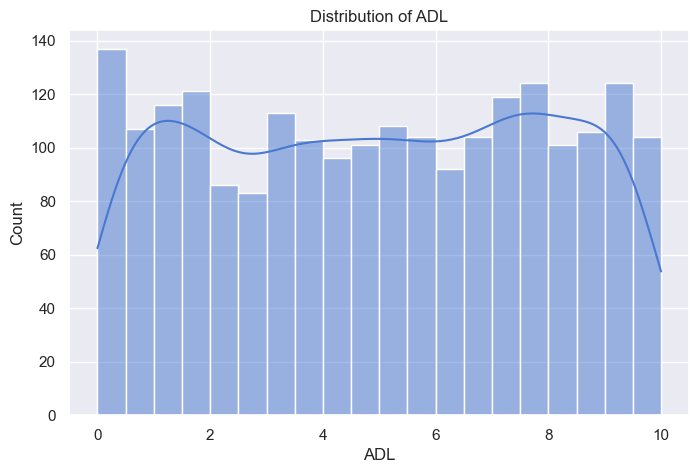

In [11]:
#                                         3.2. Distribution of Numerical Features
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()




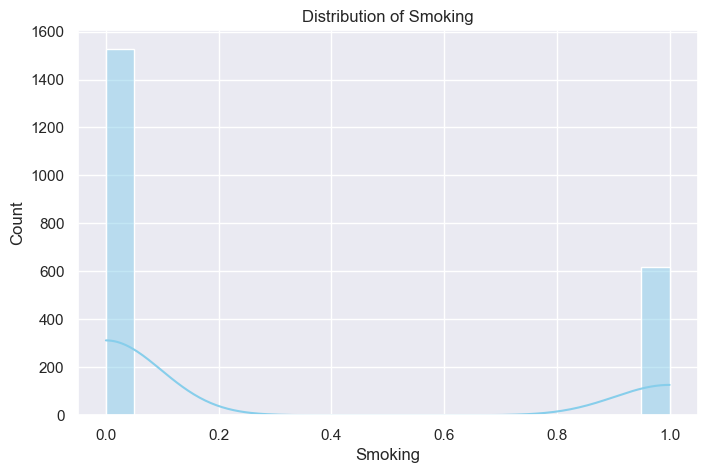

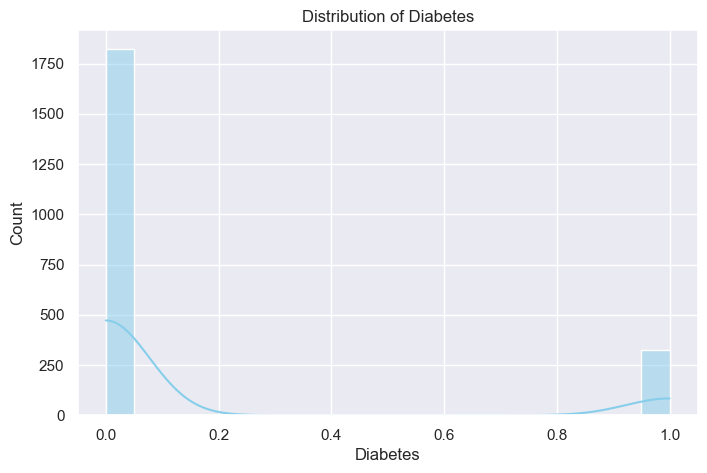

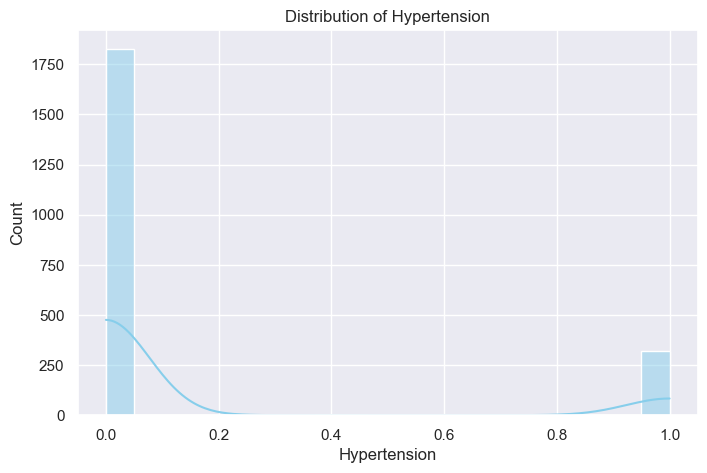

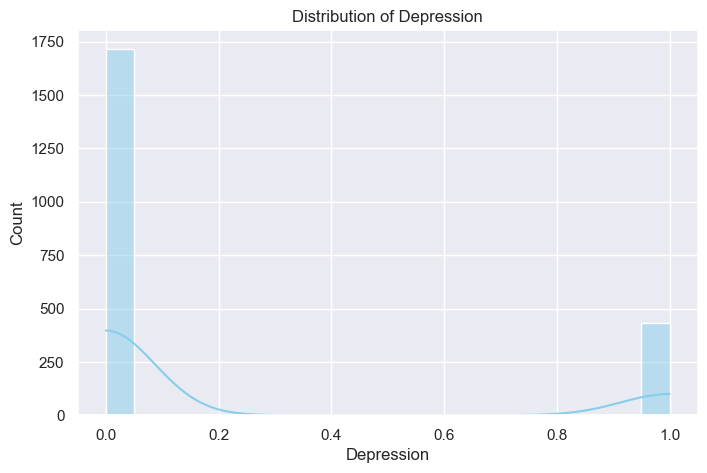

In [12]:
for i, column in enumerate(['Smoking','Diabetes','Hypertension','Depression'], 1):
    plt.figure(figsize=(8, 5))
    # Use column instead of i to access the column name
    sns.histplot(data=df, x=column, kde=True, bins=20,color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.show()

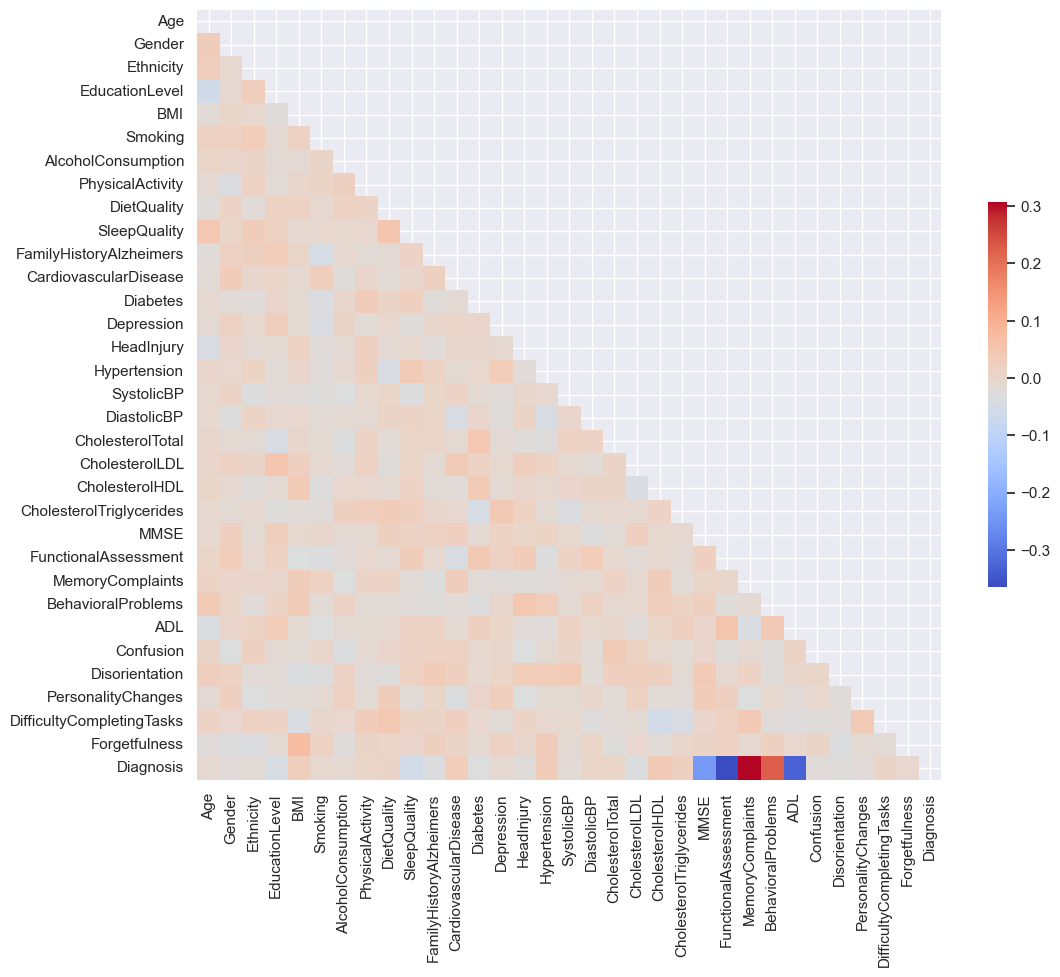

In [13]:
#                                            3.3. Exploring Correlations
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

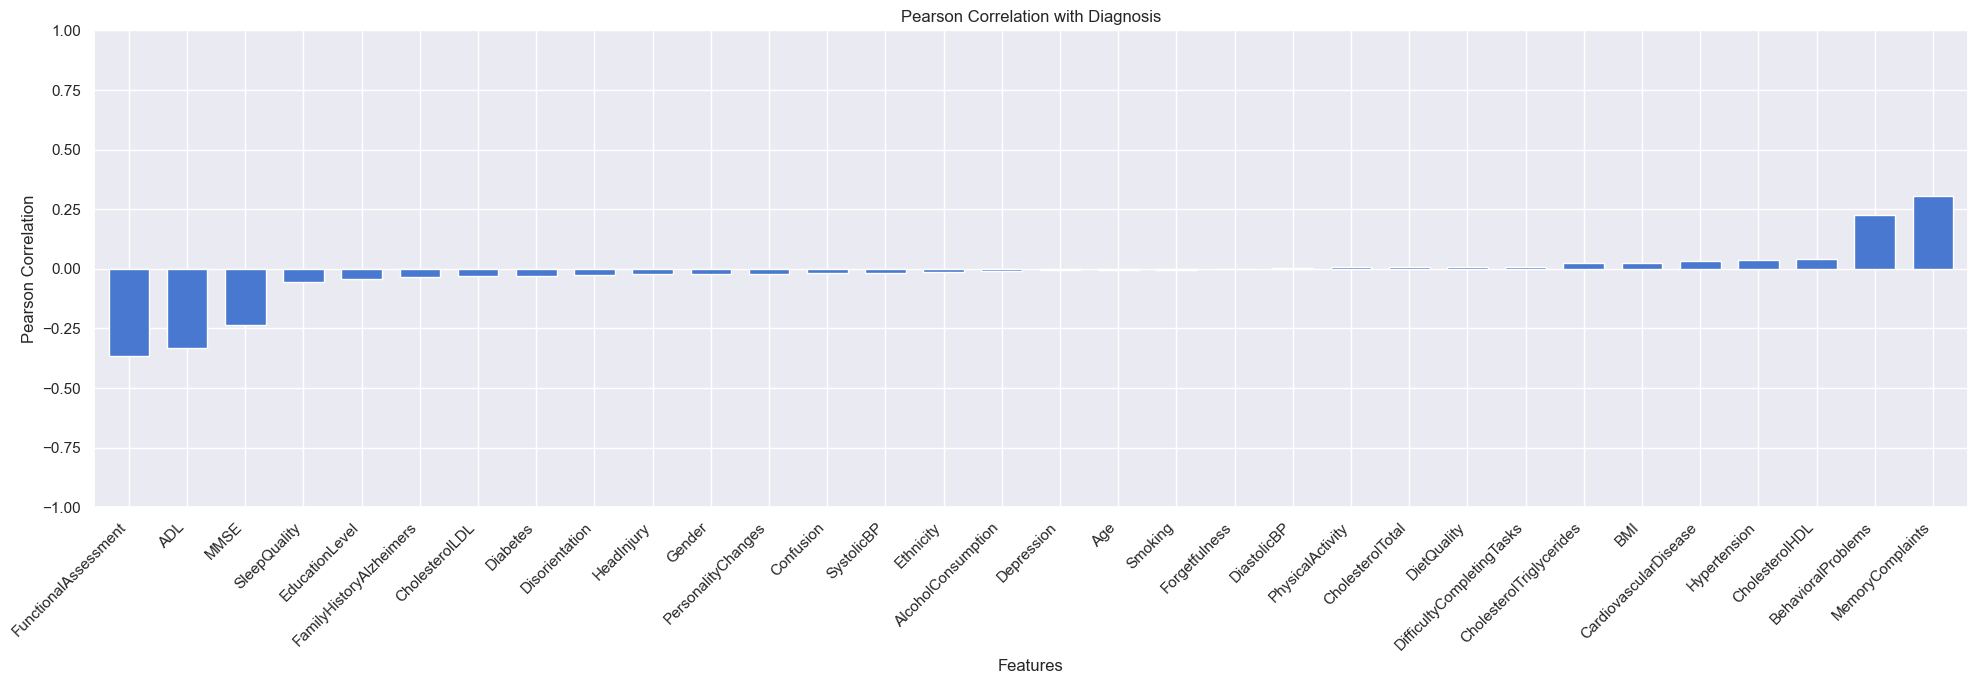

In [ ]:
# Compute Pearson correlation coefficients
#bar plot
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()
#           معامل ارتباط بيرسون
#           هو مقياس إحصائي يقيس العلاقة الخطية بين متغيرين 
# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

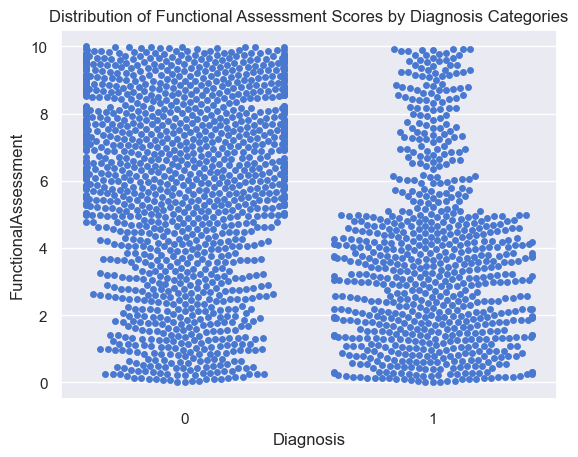

In [15]:
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis')
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

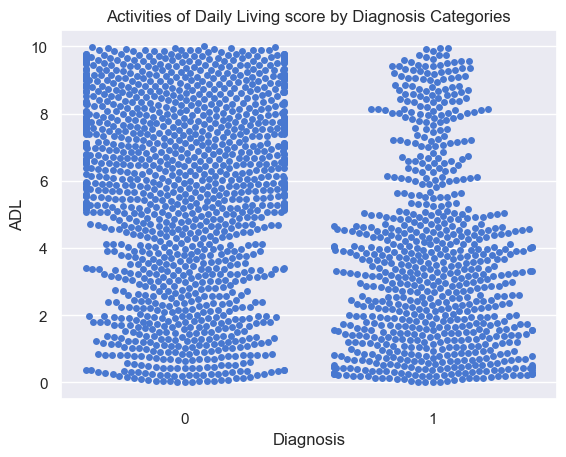

In [16]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis')
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

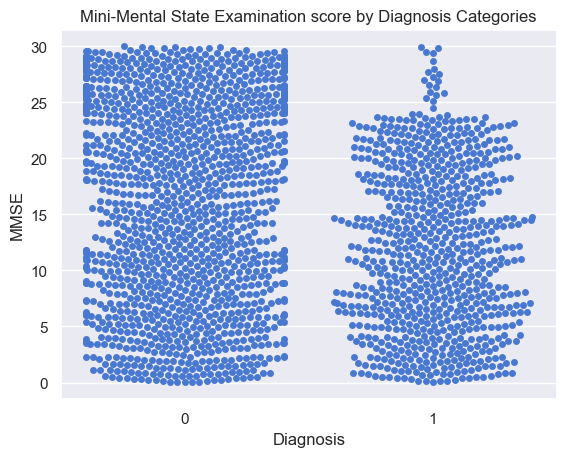

In [17]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis')
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

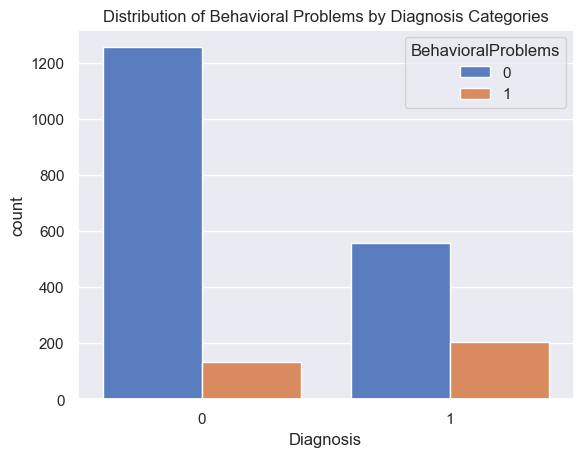

In [18]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

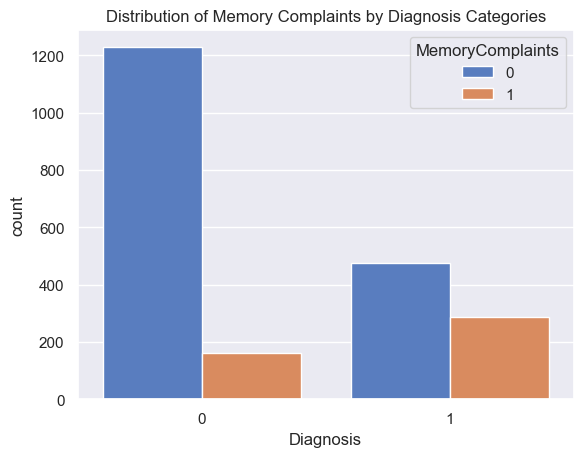

In [19]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

# Observations from Exploring Correlations
#  .As observed, there are five columns correlated with the target variable.
#  .Three numerical features—`Functional Assessment`, `ADL` (Activities of Daily Living), and `MMSE` (Mini-Mental State Examination)—are negatively correlated with the `diagnosis of Alzheimer's disease`, with correlation coefficients of -0.36, -0.33, and -0.24 respectively. This indicates that lower scores in these assessments are associated with a higher likelihood of an Alzheimer's diagnosis.
#  .Additionally, two categorical variables—`Behavioral Problems` and `Memory Complaints`—are positively correlated with the `diagnosis`, with correlation coefficients of 0.22 and 0.30 respectively. This means the presence of these issues is associated with a higher likelihood of an Alzheimer's diagnosis, highlighting their significance in the diagnostic process

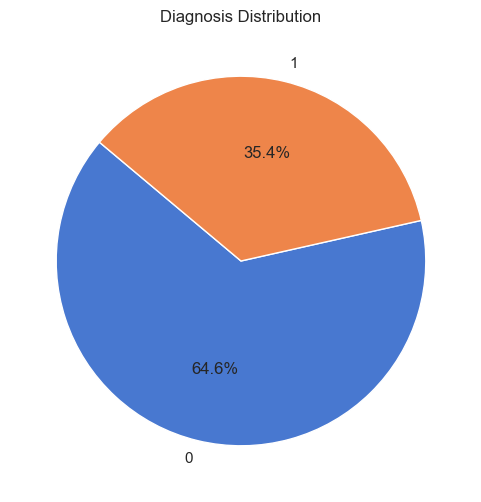

In [20]:
#                                        3.4. Distribution of a Target Variable
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

# Observation from the Target Distribution
#   Our target variable is moderately imbalanced, with 65% of instances being 0 and 35% being 1.

In [21]:
#                                   4. Data Pre-Processing
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


In [22]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 3 1 2]

Unique values in column 'EducationLevel':
[2 0 1 3]

Unique values in column 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values in column 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values in column 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values in column 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Unique values in column 'FamilyHistoryAlzheimers':
[0 1]

Unique values in column 'CardiovascularDisease':
[0

In [23]:
#columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
#min_max_scaler = MinMaxScaler()
#df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
#standard_scaler = StandardScaler()
#df[columns] = standard_scaler.fit_transform(df[columns])

# Save the scaler for later use


In [24]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


In [ ]:
#                                 5. Modelling
#split data into features and target
#feature
X = df.drop(columns = ['Diagnosis'])
#target
y = df['Diagnosis']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y)

#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       278
           1       0.89      0.90      0.90       152

    accuracy                           0.93       430
   macro avg       0.92      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430

Best Parameters: {'max_depth': 5}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.94      0.90      0.92       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

Best Parameters: {'max_depth': 12, 'n_estimators': 200}

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       278
           1       0.42     

In [26]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [27]:
# Evaluate the model: confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['0', '1'])

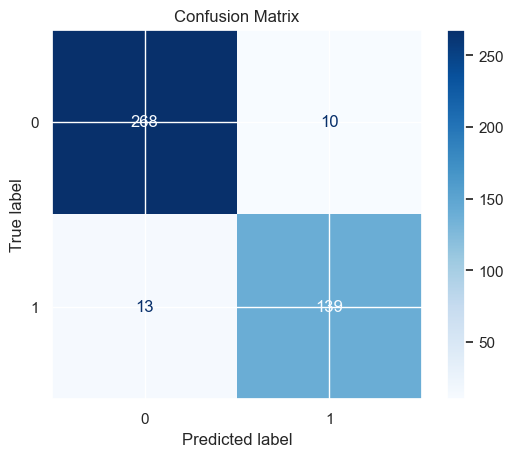

In [28]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt. show()

In [29]:
# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       278
           1       0.93      0.91      0.92       152

    accuracy                           0.95       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



In [30]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9465116279069767


In [31]:
from sklearn.metrics import hinge_loss

from sklearn.metrics import classification_report, log_loss
from sklearn.metrics import log_loss, mean_squared_error, hinge_loss, classification_report, accuracy_score

if name == 'Support Vector Machine':
        decision_function = best_model.decision_function(X_test)
        loss = hinge_loss(y_test, decision_function)
        print(f"the Loss : {loss}\n")

elif name in ['Logistic Regression', 'XGBoost', 'CatBoost']:
        probabilities = best_model.predict_proba(X_test)
        loss = log_loss(y_test, probabilities)
        print(f"the Loss : {loss}\n")

elif name in ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors']:
        loss = mean_squared_error(y_test, y_pred)
        print(f"the Loss : {loss}\n")



the Loss : 0.20877408769545233



In [32]:
import pickle

data = {
     "model": best_model,
  
    }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file) 

regressor_loaded = data["model"]



In [33]:
#print(X)
Z1=X;
print(best_model)
V=best_model
print(df.Forgetfulness)
print(regressor_loaded.feature_names_)

0       0
1       1
2       0
3       0
4       0
       ..
2144    0
2145    0
2146    0
2147    1
2148    1
Name: Forgetfulness, Length: 2149, dtype: int64
['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


In [56]:
NewDataframe=df;
df_display = NewDataframe.replace({1: "Yes", 0: "No"})
df_display['Gender'] = df_display['Gender'].replace({"Yes": 'male', "No": 'female'})
df_display['EducationLevel'] = df_display['EducationLevel'].replace({"No": 'None',"Yes": 'High School',2: 'Bachelor\'s',3: 'Higher'})
df_display['Ethnicity'] = df_display['Ethnicity'].replace({"No": 'Caucasian',"Yes": 'African American',2: 'Asian',3: 'Other'})

NewDataframe.head(18)



,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
5,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0
6,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0
7,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1
8,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0
9,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0


In [65]:
#df_display.head(4)

#8 - 18  = 1
#df_display.head(8)
#df_display.iloc[5:11]
filtered_data1 = df_display[df_display['Diagnosis'] == "Yes"]
filtered_data0 = df_display[df_display['Diagnosis'] == "No"]

# Display the filtered data
filtered_data0.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,female,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,No,No,Yes,No,No
1,89,female,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,No,Yes,No
2,73,female,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,Yes,No,No
3,74,male,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,No,No,No,No,No,No,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,No,No,No,No,No
4,89,female,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No


In [64]:
filtered_data1.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
7,75,female,Caucasian,High School,18.776009,No,13.723826,4.649451,8.341903,4.213210,No,No,No,No,No,No,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,No,No,4.517248,Yes,No,No,No,Yes,Yes
13,78,male,Caucasian,High School,28.870652,Yes,10.194706,0.631281,1.653281,7.333236,Yes,No,No,No,No,No,137,82,221.305338,194.600379,26.333920,357.582771,7.852082,4.510713,Yes,No,1.939596,No,Yes,No,No,No,Yes
15,69,female,Caucasian,High School,18.045917,No,8.116832,2.956495,7.570633,6.736797,No,No,No,No,No,Yes,124,72,204.670759,97.755649,99.286339,246.910767,22.715161,3.743028,No,No,1.911131,No,No,No,No,Yes,Yes
16,63,male,African American,Bachelor's,22.822896,Yes,4.433961,7.182895,7.929486,4.654828,No,Yes,No,No,No,No,148,116,200.500123,181.023560,51.867138,119.656386,7.167602,9.365946,Yes,No,1.382086,No,No,No,No,No,Yes
17,65,male,Caucasian,High School,16.333283,Yes,4.161795,1.306320,2.888936,5.436423,No,No,No,No,No,Yes,154,61,183.112333,101.258196,39.229666,374.855165,18.049294,4.019546,No,No,2.892940,No,No,No,No,No,Yes
